<a href="https://colab.research.google.com/github/DIWEERAPURA/Image-Processing-CV-Projects-and-Deep-Learning-Vision-Tasks/blob/main/Energy_Demand_Prediction_and_Time_Series_for_Website_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving TimeSeries_TotalSolarGen_and_Load_IT_2016.csv to TimeSeries_TotalSolarGen_and_Load_IT_2016.csv
Data Head:


,utc_timestamp,IT_load_new,IT_solar_generation
0,2016-01-01 00:00:00+00:00,21665.0,1
1,2016-01-01 01:00:00+00:00,20260.0,0
2,2016-01-01 02:00:00+00:00,19056.0,0
3,2016-01-01 03:00:00+00:00,18407.0,0
4,2016-01-01 04:00:00+00:00,18425.0,0


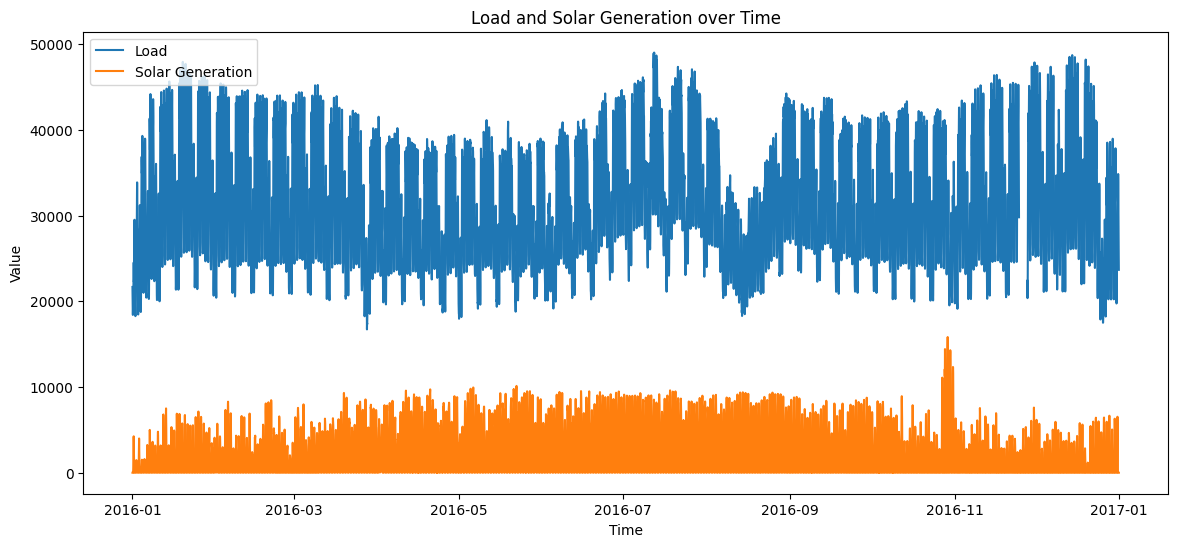

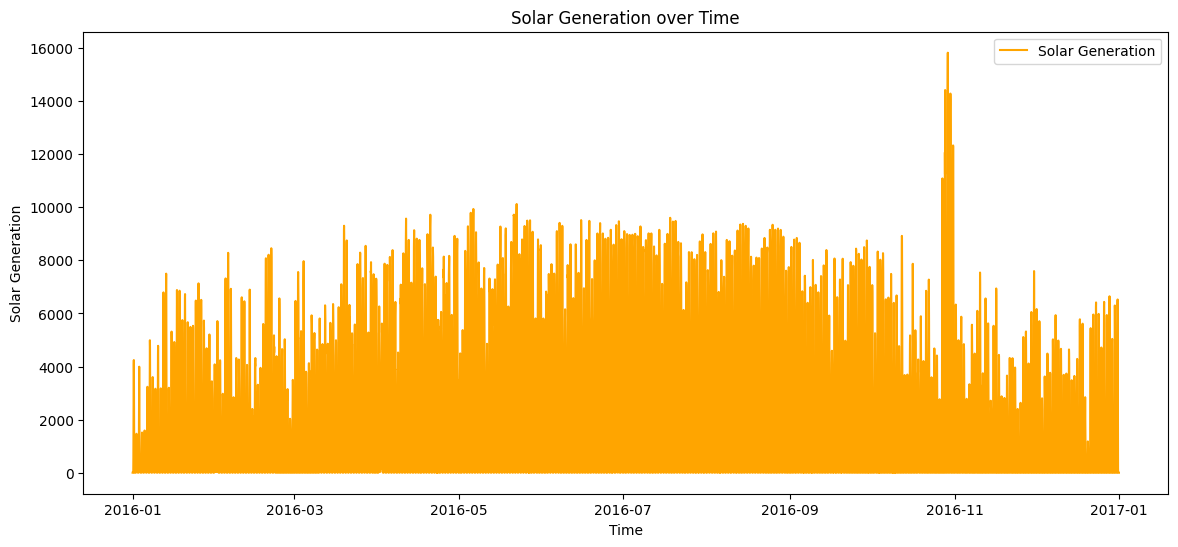

Missing values before filling:
utc_timestamp           0
IT_load_new            72
IT_solar_generation     0
dtype: int64

Missing values after filling:
utc_timestamp          0
IT_load_new            0
IT_solar_generation    0
dtype: int64


<ipython-input-1-3e8985e6cb00>:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['IT_load_new'].fillna(method='ffill', inplace=True)
<ipython-input-1-3e8985e6cb00>:65: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['IT_load_new'].fillna(method='ffill', inplace=True)



ADF test for 'IT_load_new':
Results of Dickey-Fuller Test:
Test Statistic                -1.197390e+01
p-value                        3.841445e-22
#Lags Used                     3.700000e+01
Number of Observations Used    8.746000e+03
Critical Value (1%)           -3.431098e+00
Critical Value (5%)           -2.861871e+00
Critical Value (10%)          -2.566946e+00
dtype: float64

ADF test for 'IT_solar_generation':
Results of Dickey-Fuller Test:
Test Statistic                -5.741335e+00
p-value                        6.265438e-07
#Lags Used                     3.600000e+01
Number of Observations Used    8.747000e+03
Critical Value (1%)           -3.431098e+00
Critical Value (5%)           -2.861870e+00
Critical Value (10%)          -2.566946e+00
dtype: float64


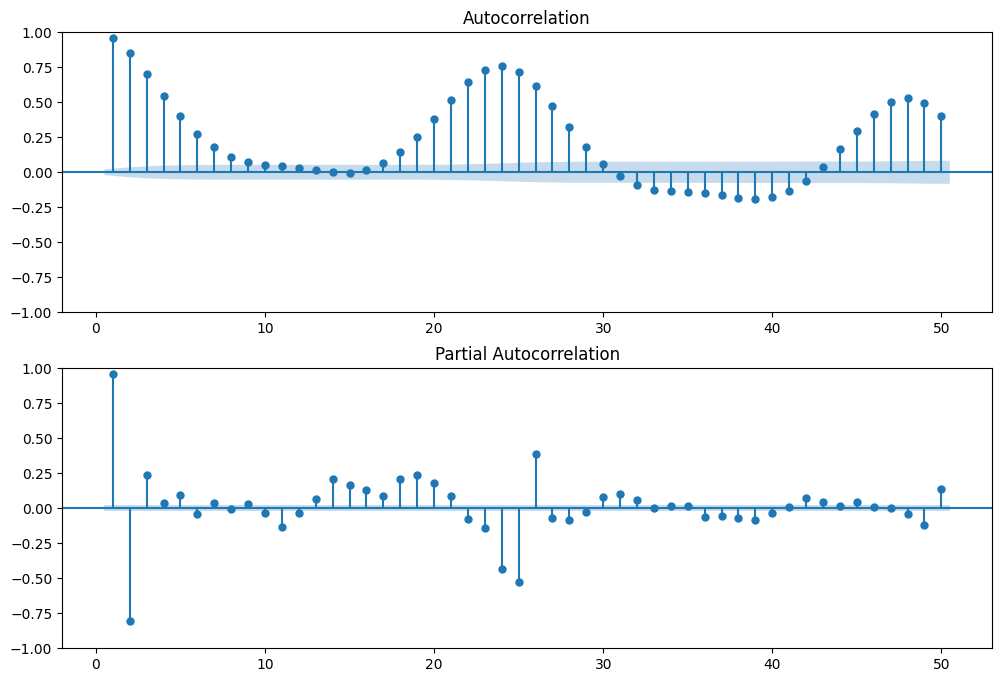

RMSE for IT_load_new ARIMA(2,0,2): 7714.952134850774
RMSE for IT_load_new ARIMA(2,1,2): 7993.849413715497


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE for IT_load_new ARIMA(2,2,2): 9278.808888674403


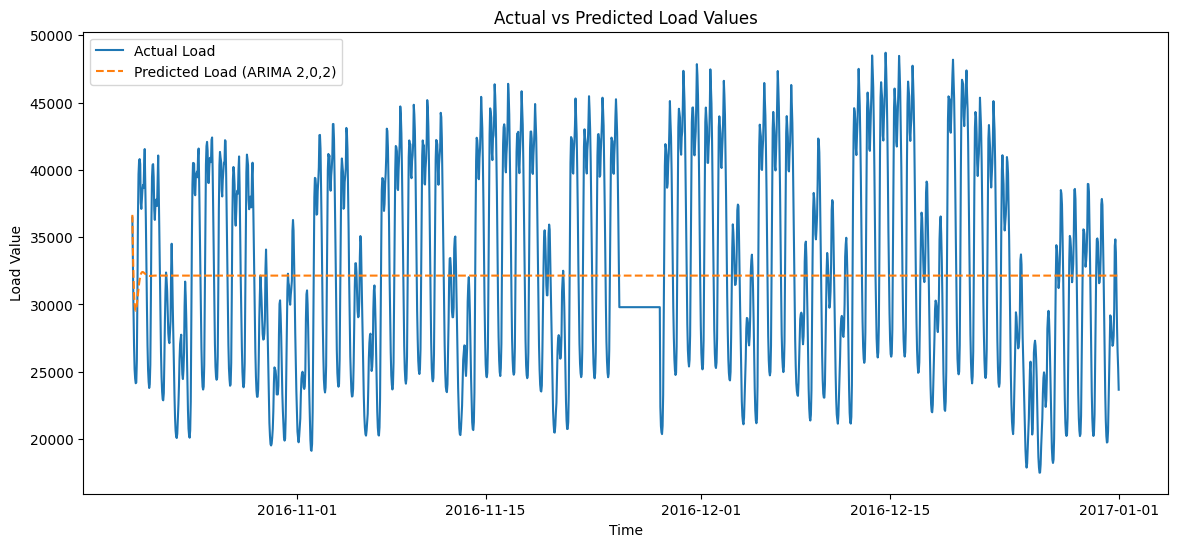

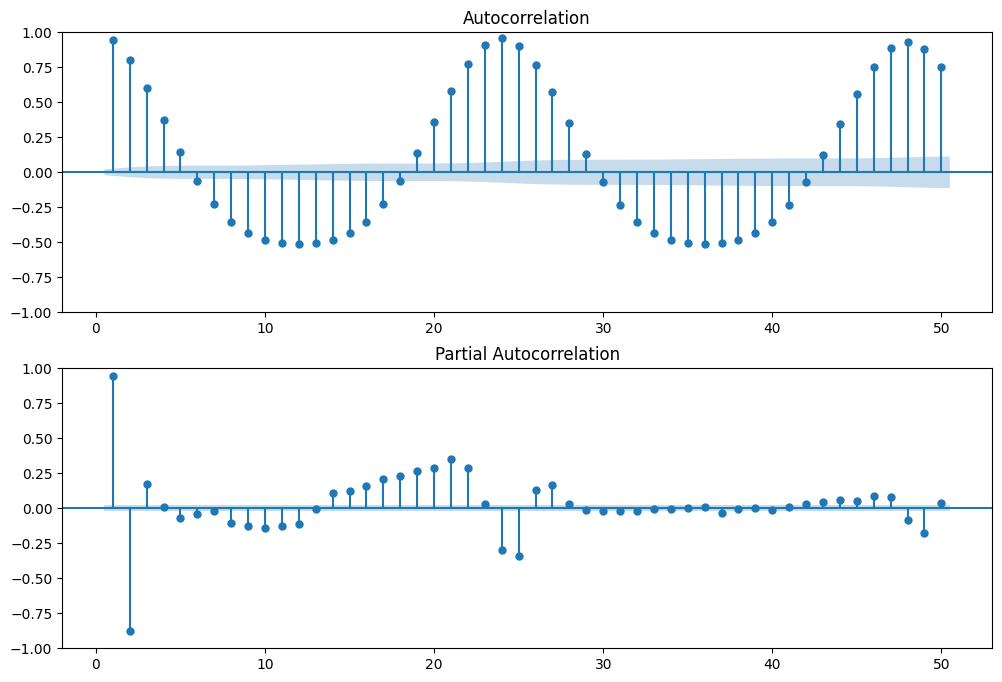

RMSE for IT_solar_generation ARIMA(2,0,2): 2486.1507110911857


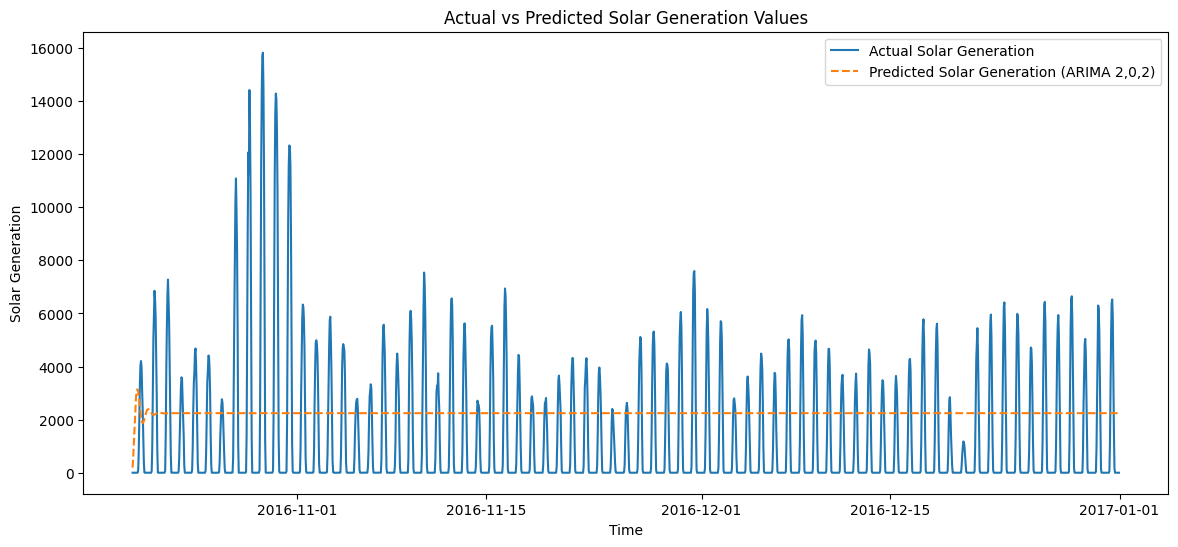

In [ ]:
#%% [markdown]
# # Time Series Analysis and Forecasting with ARIMA
#
# This notebook loads a CSV file containing time series data for load and solar generation, visualizes the data,
# checks for missing values and stationarity, and then builds ARIMA models for forecasting.

#%% [code]
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# For file upload in Google Colab
from google.colab import files

# Upload CSV file
uploaded = files.upload()  # After running this cell, select 'TimeSeries_TotalSolarGen_and_Load_IT_2016.csv'

# Load the data into a DataFrame
data = pd.read_csv('TimeSeries_TotalSolarGen_and_Load_IT_2016.csv')

# Convert utc_timestamp column to datetime
data['utc_timestamp'] = pd.to_datetime(data['utc_timestamp'])

# Display the first few rows
print("Data Head:")
display(data.head())

#%% [markdown]
# ## Data Visualization
#
# Plot the time series for both load and solar generation.

#%% [code]
plt.figure(figsize=(14,6))
plt.plot(data['utc_timestamp'], data['IT_load_new'], label='Load')
plt.plot(data['utc_timestamp'], data['IT_solar_generation'], label='Solar Generation')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Load and Solar Generation over Time')
plt.show()

# Plot only the solar generation data for a closer look
plt.figure(figsize=(14,6))
plt.plot(data['utc_timestamp'], data['IT_solar_generation'], label='Solar Generation', color='orange')
plt.xlabel('Time')
plt.ylabel('Solar Generation')
plt.legend()
plt.title('Solar Generation over Time')
plt.show()

#%% [markdown]
# ## Handle Missing Values
#
# Check for missing values and use a forward fill method for the load data.

#%% [code]
# Check missing values
print("Missing values before filling:")
print(data.isnull().sum())

# Fill missing values for 'IT_load_new'
data['IT_load_new'].fillna(method='ffill', inplace=True)

# Verify missing values after filling
print("\nMissing values after filling:")
print(data.isnull().sum())

#%% [markdown]
# ## Check for Stationarity
#
# Use the Augmented Dickey-Fuller (ADF) test to check if the series are stationary.
# The null hypothesis of the ADF test is that the series is non-stationary.

#%% [code]
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    """Perform ADF test and print results."""
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

print("\nADF test for 'IT_load_new':")
adf_test(data['IT_load_new'])

print("\nADF test for 'IT_solar_generation':")
adf_test(data['IT_solar_generation'])

#%% [markdown]
# ## ARIMA Modeling for IT_load_new
#
# First, we plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) for the load series to help decide model parameters.

#%% [code]
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))
plot_acf(data['IT_load_new'], lags=50, zero=False, ax=ax1)
plot_pacf(data['IT_load_new'], lags=50, zero=False, ax=ax2)
plt.show()

# From the PACF plot, a sharp drop after lag 2 is noticeable.
# We'll use p=2 and q=2. Since the series is stationary (d=0), we start with order (2,0,2).

#%% [markdown]
# ### Splitting Data and Fitting the ARIMA Model
#
# We'll use 80% of the data for training and the remaining 20% for testing.

#%% [code]
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Split the data into training (80%) and testing (20%) sets
train_size = int(len(data) * 0.8)
train_load = data['IT_load_new'][:train_size]
test_load = data['IT_load_new'][train_size:]

# Fit the ARIMA model with order (2,0,2)
model_load = ARIMA(train_load, order=(2, 0, 2))
model_load_fit = model_load.fit()

# Forecast on the test set
predictions_load = model_load_fit.predict(start=train_size, end=len(data)-1)

# Calculate RMSE
rmse_load = sqrt(mean_squared_error(test_load, predictions_load))
print("RMSE for IT_load_new ARIMA(2,0,2):", rmse_load)

# Optionally, you can try other orders:
# ARIMA(2,1,2)
model_load_21 = ARIMA(train_load, order=(2, 1, 2))
model_load_fit21 = model_load_21.fit()
predictions_load21 = model_load_fit21.predict(start=train_size, end=len(data)-1)
rmse_load21 = sqrt(mean_squared_error(test_load, predictions_load21))
print("RMSE for IT_load_new ARIMA(2,1,2):", rmse_load21)

# ARIMA(2,2,2)
model_load_22 = ARIMA(train_load, order=(2, 2, 2))
model_load_fit22 = model_load_22.fit()
predictions_load22 = model_load_fit22.predict(start=train_size, end=len(data)-1)
rmse_load22 = sqrt(mean_squared_error(test_load, predictions_load22))
print("RMSE for IT_load_new ARIMA(2,2,2):", rmse_load22)

#%% [markdown]
# ### Visualizing the Forecast
#
# Plot the actual versus predicted load values.

#%% [code]
plt.figure(figsize=(14,6))
plt.plot(data['utc_timestamp'][train_size:], test_load, label='Actual Load')
plt.plot(data['utc_timestamp'][train_size:], predictions_load, label='Predicted Load (ARIMA 2,0,2)', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Load Value')
plt.legend()
plt.title('Actual vs Predicted Load Values')
plt.show()

#%% [markdown]
# ## ARIMA Modeling for IT_solar_generation
#
# Next, we repeat the process for the solar generation data.

#%% [code]
# Splitting data for solar generation
train_solar = data['IT_solar_generation'][:train_size]
test_solar = data['IT_solar_generation'][train_size:]

# Plot ACF and PACF for solar generation
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))
plot_acf(data['IT_solar_generation'], lags=50, zero=False, ax=ax1)
plot_pacf(data['IT_solar_generation'], lags=50, zero=False, ax=ax2)
plt.show()

# Fit the ARIMA model for solar generation using order (2,0,2)
model_solar = ARIMA(train_solar, order=(2, 0, 2))
model_solar_fit = model_solar.fit()

# Forecast on the test set
predictions_solar = model_solar_fit.predict(start=train_size, end=len(data)-1)

# Calculate RMSE for solar generation forecasts
rmse_solar = sqrt(mean_squared_error(test_solar, predictions_solar))
print("RMSE for IT_solar_generation ARIMA(2,0,2):", rmse_solar)

#%% [markdown]
# ### Visualizing the Solar Generation Forecast
#
# Plot actual versus predicted solar generation values.

#%% [code]
plt.figure(figsize=(14,6))
plt.plot(data['utc_timestamp'][train_size:], test_solar, label='Actual Solar Generation')
plt.plot(data['utc_timestamp'][train_size:], predictions_solar, label='Predicted Solar Generation (ARIMA 2,0,2)', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Solar Generation')
plt.legend()
plt.title('Actual vs Predicted Solar Generation Values')
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.0 MB/s eta 0:00:00


Saving TimeSeries_TotalSolarGen_and_Load_IT_2016.csv to TimeSeries_TotalSolarGen_and_Load_IT_2016.csv


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Starting GA optimization for ARIMA hyperparameters...
Generation 0


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  Best RMSE so far: 7699.5930
Generation 1


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  Best RMSE so far: 7636.0809
Generation 2
  Best RMSE so far: 7636.0809
Generation 3
  Best RMSE so far: 7636.0809
Generation 4
  Best RMSE so far: 7636.0809
Generation 5
  Best RMSE so far: 7636.0809
Generation 6


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  Best RMSE so far: 7517.6450
Generation 7


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  Best RMSE so far: 7517.6450
Generation 8


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  Best RMSE so far: 7517.6450
Generation 9


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  Best RMSE so far: 7517.6450

Optimal ARIMA hyperparameters found:
  p = 3, d = 1, q = 5
  Corresponding RMSE: 7517.6450


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


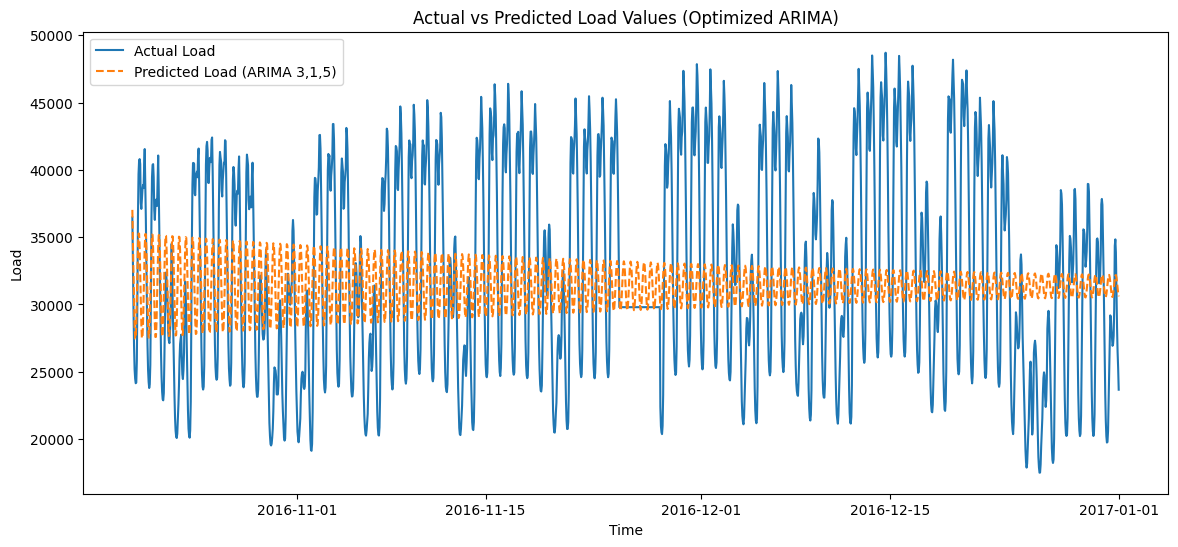

In [ ]:
# Install DEAP if not already installed
!pip install deap

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from deap import base, creator, tools, algorithms

# --------------------------
# 1. Data Loading & Preprocessing
# --------------------------
from google.colab import files

# Upload your CSV file (TimeSeries_TotalSolarGen_and_Load_IT_2016.csv)
uploaded = files.upload()

# Load the data
data = pd.read_csv('TimeSeries_TotalSolarGen_and_Load_IT_2016.csv')
data['utc_timestamp'] = pd.to_datetime(data['utc_timestamp'])

# Forward-fill missing values for 'IT_load_new'
data['IT_load_new'].fillna(method='ffill', inplace=True)

# Split data: 80% training, 20% testing (for IT_load_new)
train_size = int(len(data) * 0.8)
train_load = data['IT_load_new'][:train_size]
test_load = data['IT_load_new'][train_size:]

# --------------------------
# 2. Define the GA Evaluation Function
# --------------------------
def evaluate_arima(individual):
    """
    Evaluate ARIMA model using the candidate hyperparameters.
    'individual' is a list: [p, d, q].
    Returns a tuple with one element: the negative RMSE.
    """
    # Convert genes to integers (in case they are floats)
    p, d, q = int(individual[0]), int(individual[1]), int(individual[2])
    try:
        # Fit the ARIMA model on training data
        model = ARIMA(train_load, order=(p, d, q))
        model_fit = model.fit()
        # Forecast on the test set
        predictions = model_fit.predict(start=train_size, end=len(data)-1)
        rmse = sqrt(mean_squared_error(test_load, predictions))
        fitness = -rmse  # Negative RMSE (because we maximize fitness)
    except Exception as e:
        # If model fitting fails, return a very low fitness
        fitness = -1e6
    return (fitness,)

# --------------------------
# 3. Set Up the Genetic Algorithm using DEAP
# --------------------------
# Create a fitness class (we maximize the fitness) and individual class.
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
# Define genes:
# p in [0, 5], d in [0, 2], q in [0, 5]
toolbox.register("attr_p", random.randint, 0, 5)
toolbox.register("attr_d", random.randint, 0, 2)
toolbox.register("attr_q", random.randint, 0, 5)

# Structure initializers
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_p, toolbox.attr_d, toolbox.attr_q), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Register the evaluation, crossover, mutation, and selection functions
toolbox.register("evaluate", evaluate_arima)
toolbox.register("mate", tools.cxTwoPoint)
# Use mutUniformInt to mutate each gene with a probability, within given ranges
toolbox.register("mutate", tools.mutUniformInt, low=[0, 0, 0], up=[5, 2, 5], indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# GA parameters
population_size = 20
num_generations = 10
crossover_prob = 0.8
mutation_prob = 0.2

# Create initial population
population = toolbox.population(n=population_size)

# Evaluate the entire population
fitnesses = list(map(toolbox.evaluate, population))
for ind, fit in zip(population, fitnesses):
    ind.fitness.values = fit

# --------------------------
# 4. Run the Evolutionary Process
# --------------------------
print("Starting GA optimization for ARIMA hyperparameters...")
for gen in range(num_generations):
    print(f"Generation {gen}")
    # Select the next generation individuals
    offspring = toolbox.select(population, len(population))
    offspring = list(map(toolbox.clone, offspring))

    # Apply crossover on the offspring
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < crossover_prob:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    # Apply mutation on the offspring
    for mutant in offspring:
        if random.random() < mutation_prob:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # Replace the old population with the offspring
    population[:] = offspring

    # Gather and print stats for this generation
    fits = [ind.fitness.values[0] for ind in population]
    best_rmse = -max(fits)  # since fitness = -RMSE, best fitness gives lowest RMSE
    print(f"  Best RMSE so far: {best_rmse:.4f}")

# Identify the best individual from the final population
best_individual = tools.selBest(population, 1)[0]
best_p, best_d, best_q = int(best_individual[0]), int(best_individual[1]), int(best_individual[2])
best_rmse = -best_individual.fitness.values[0]
print("\nOptimal ARIMA hyperparameters found:")
print(f"  p = {best_p}, d = {best_d}, q = {best_q}")
print(f"  Corresponding RMSE: {best_rmse:.4f}")

# --------------------------
# 5. Fit and Visualize the Best Model
# --------------------------
# Fit the optimal ARIMA model on training data and forecast
best_model = ARIMA(train_load, order=(best_p, best_d, best_q))
best_model_fit = best_model.fit()
predictions_best = best_model_fit.predict(start=train_size, end=len(data)-1)

# Plot the actual vs predicted values
plt.figure(figsize=(14,6))
plt.plot(data['utc_timestamp'][train_size:], test_load, label='Actual Load')
plt.plot(data['utc_timestamp'][train_size:], predictions_best, label=f'Predicted Load (ARIMA {best_p},{best_d},{best_q})', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Load')
plt.legend()
plt.title('Actual vs Predicted Load Values (Optimized ARIMA)')
plt.show()


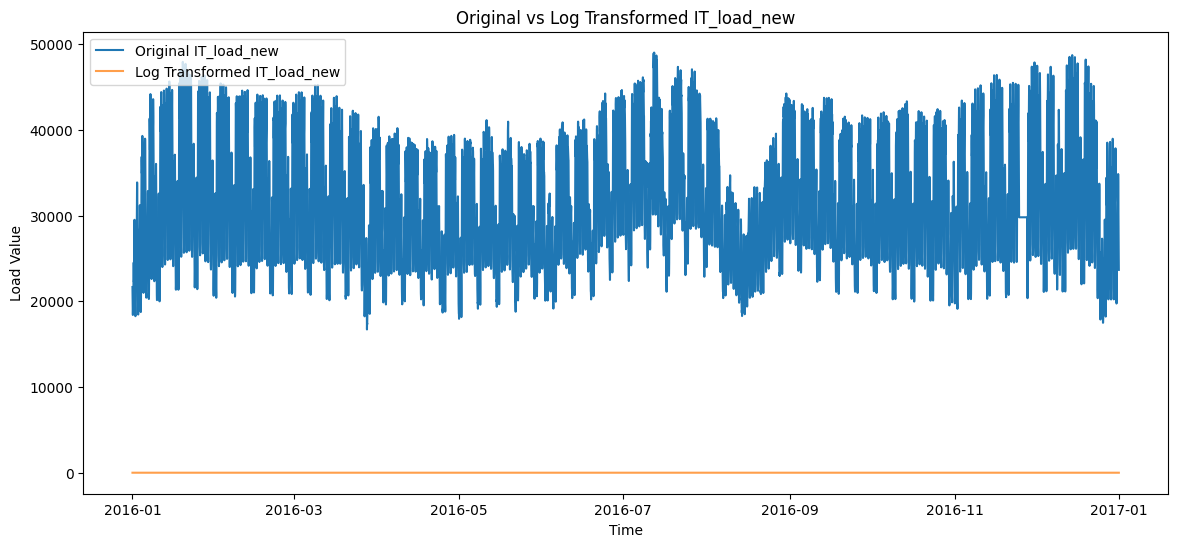

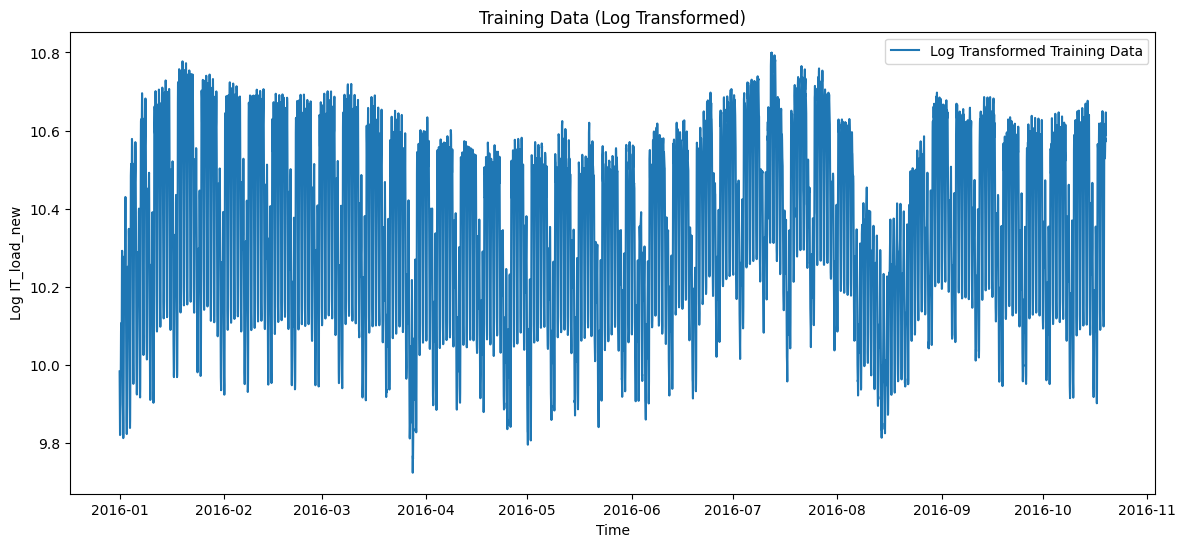

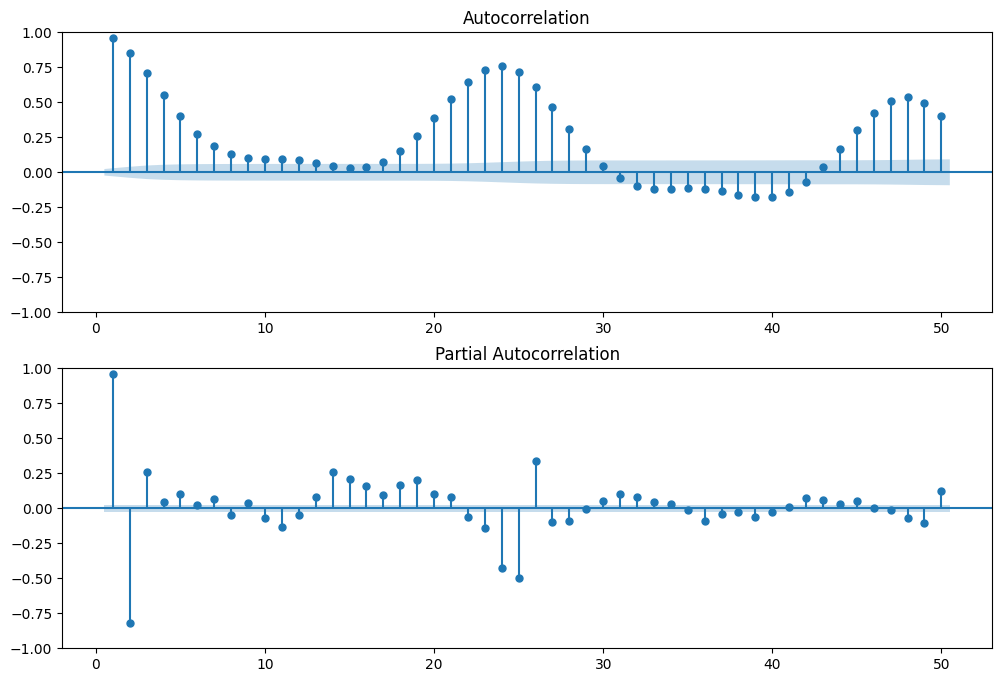

ADF test for log-transformed training data:
Results of Dickey-Fuller Test:
Test Statistic                -9.996007e+00
p-value                        1.939477e-17
#Lags Used                     3.500000e+01
Number of Observations Used    6.991000e+03
Critical Value (1%)           -3.431286e+00
Critical Value (5%)           -2.861954e+00
Critical Value (10%)          -2.566990e+00
dtype: float64

Series is stationary (p-value <= 0.05). No differencing applied.


In [ ]:
#%% [markdown]
# ## Log Transformation and Data Splitting
#
# We first apply a log transformation to the 'IT_load_new' column to stabilize variance. Then, we split the data into training (80%) and testing (20%) sets.

#%% [code]
# Create a log-transformed column (adding 1 to avoid log(0))
data['log_IT_load_new'] = np.log(data['IT_load_new'] + 1)

# Plot original vs log-transformed series
plt.figure(figsize=(14,6))
plt.plot(data['utc_timestamp'], data['IT_load_new'], label='Original IT_load_new')
plt.plot(data['utc_timestamp'], data['log_IT_load_new'], label='Log Transformed IT_load_new', alpha=0.75)
plt.xlabel('Time')
plt.ylabel('Load Value')
plt.legend()
plt.title('Original vs Log Transformed IT_load_new')
plt.show()

# Split data: 80% for training, 20% for testing
train_size = int(len(data) * 0.8)
train_log = data['log_IT_load_new'][:train_size]
test_log = data['log_IT_load_new'][train_size:]

#%% [markdown]
# ## Plot Training Data and Check Stationarity
#
# First, we plot the log-transformed training data. Then, we plot its ACF and PACF to visually inspect for stationarity. Finally, we perform an Augmented Dickey-Fuller test.

#%% [code]
# Plot the log-transformed training data
plt.figure(figsize=(14,6))
plt.plot(data['utc_timestamp'][:train_size], train_log, label='Log Transformed Training Data')
plt.xlabel('Time')
plt.ylabel('Log IT_load_new')
plt.legend()
plt.title('Training Data (Log Transformed)')
plt.show()

# Plot ACF and PACF for the training data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))
plot_acf(train_log, lags=50, zero=False, ax=ax1)
plot_pacf(train_log, lags=50, zero=False, ax=ax2)
plt.show()

#%% [code]
# Define a function to perform the Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    """Perform ADF test and print the results."""
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

print("ADF test for log-transformed training data:")
adf_test(train_log)

#%% [markdown]
# ## Differencing if Needed
#
# If the ADF test indicates non-stationarity (p-value > 0.05), we difference the series and repeat the test.

#%% [code]
# Get the p-value from the ADF test
adf_result = adfuller(train_log, autolag='AIC')
p_value = adf_result[1]

if p_value > 0.05:
    print("\nSeries is non-stationary (p-value > 0.05). Applying first differencing.")
    train_log_diff = train_log.diff().dropna()

    # Plot the differenced series
    plt.figure(figsize=(14,6))
    plt.plot(data['utc_timestamp'][1:train_size], train_log_diff, label='Differenced Log IT_load_new')
    plt.xlabel('Time')
    plt.ylabel('Differenced Log IT_load_new')
    plt.legend()
    plt.title('Differenced Log Transformed Training Data')
    plt.show()

    print("ADF test for the differenced series:")
    adf_test(train_log_diff)
else:
    print("\nSeries is stationary (p-value <= 0.05). No differencing applied.")


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-27173.689, Time=8.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-18354.770, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-25160.023, Time=0.48 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-23765.192, Time=1.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-18356.758, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-26199.998, Time=6.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-26910.398, Time=6.58 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-27111.106, Time=9.01 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-27171.880, Time=8.94 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-26098.414, Time=2.64 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-26361.315, Time=7.59 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-27127.338, Time=9.34 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-27138.190, Time=10.73 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-27178.070, Time=3.31 sec
 ARI

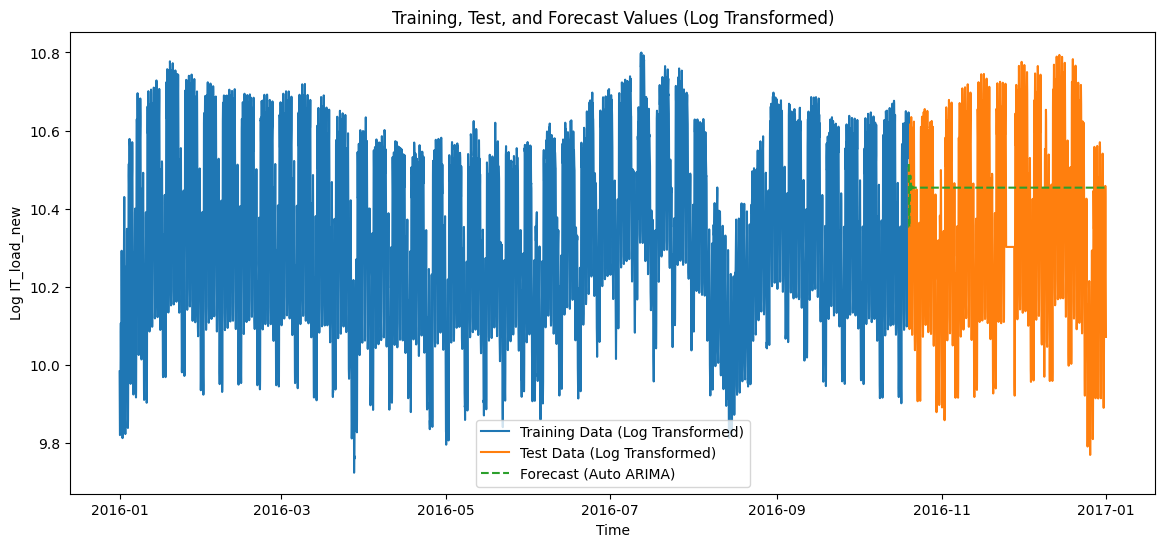

In [ ]:
#%% [code]
# Install pmdarima if needed
!pip install pmdarima

from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from math import sqrt

# Fit auto_arima on the log-transformed training data.
# We set seasonal=False since the current approach is for non-seasonal ARIMA.
model_auto = auto_arima(train_log, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
print(model_auto.summary())

# Forecast for the test period (last 20% of the data)
n_periods = len(test_log)
forecast_log = model_auto.predict(n_periods=n_periods)

# Calculate RMSE on the log scale
rmse_auto = sqrt(mean_squared_error(test_log, forecast_log))
print("RMSE for the Auto ARIMA model on log-transformed data:", rmse_auto)

#%% [code]
# Plot training data, test data, and the forecast
plt.figure(figsize=(14,6))
plt.plot(data['utc_timestamp'][:train_size], train_log, label='Training Data (Log Transformed)')
plt.plot(data['utc_timestamp'][train_size:], test_log, label='Test Data (Log Transformed)')
plt.plot(data['utc_timestamp'][train_size:], forecast_log, label='Forecast (Auto ARIMA)', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Log IT_load_new')
plt.legend()
plt.title('Training, Test, and Forecast Values (Log Transformed)')
plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-26960.364, Time=9.96 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-18205.645, Time=0.37 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-24962.574, Time=0.60 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-23569.147, Time=1.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-18207.634, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-25992.743, Time=3.68 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-26703.041, Time=6.81 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-26886.017, Time=9.30 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-26960.359, Time=8.42 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-25890.929, Time=2.73 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-26154.225, Time=6.98 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-26876.167, Time=8.33 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-26940.372, Time=11.76 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-26965.425, Time=4.06 sec
 ARI

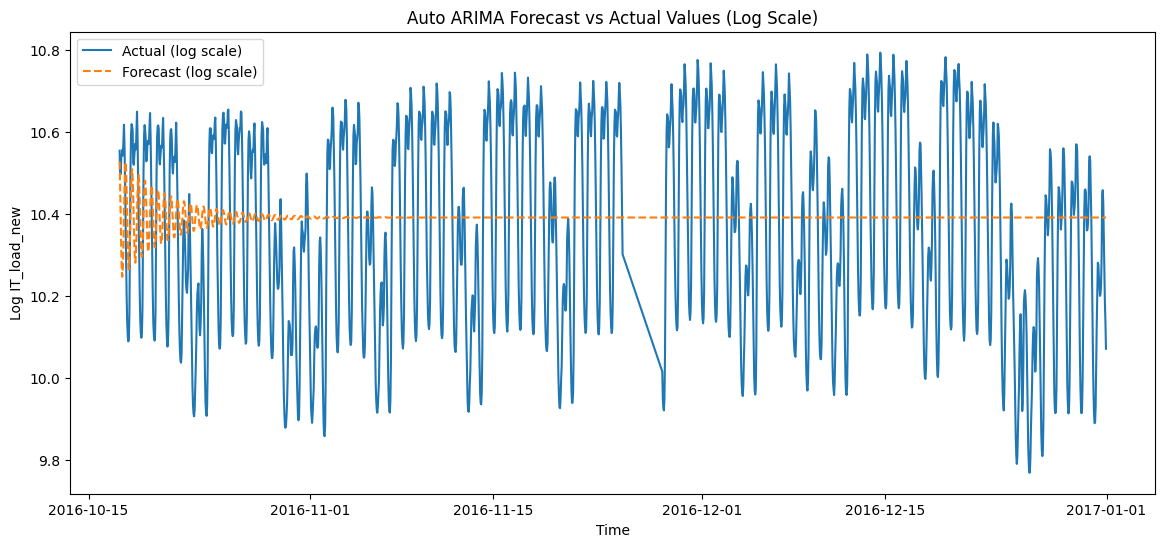

In [ ]:
import numpy as np
import pandas as pd
import pmdarima as pm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your data (adjust file path as needed)
data = pd.read_csv('TimeSeries_TotalSolarGen_and_Load_IT_2016.csv')
data['utc_timestamp'] = pd.to_datetime(data['utc_timestamp'])

# Log-transform the IT_load_new column
# If there are zeros in IT_load_new, they will be replaced with NaN to avoid -inf in log transformation.
data['log_IT_load_new'] = np.log(data['IT_load_new'].replace(0, np.nan))
# Drop any rows where the log transform resulted in NaN values.
data.dropna(subset=['log_IT_load_new'], inplace=True)

# Split the data into training (80%) and testing (20%)
train_size = int(len(data) * 0.8)
train, test = data['log_IT_load_new'][:train_size], data['log_IT_load_new'][train_size:]

# Fit the auto ARIMA model on the training data
model = pm.auto_arima(train, seasonal=False, stepwise=True, trace=True)
model.fit(train)

# Forecast for the test period
n_periods = len(test)
forecast = model.predict(n_periods=n_periods)

# Check for NaN values in test and forecast arrays
print("Number of NaNs in test:", np.sum(np.isnan(test.values)))
print("Number of NaNs in forecast:", np.sum(np.isnan(forecast)))

# Create a mask to filter out any NaN values before calculating RMSE
mask = ~np.isnan(test.values) & ~np.isnan(forecast)
if np.sum(mask) == 0:
    print("No valid data points to compute RMSE")
else:
    rmse = np.sqrt(mean_squared_error(test.values[mask], forecast[mask]))
    print("RMSE for the Auto ARIMA model on log-transformed data:", rmse)

# Optionally, plot the actual vs predicted values on the log scale.
# We use the mask to plot only the points where both actual and forecast values are valid.
timestamps = data['utc_timestamp'][train_size:].values
plt.figure(figsize=(14,6))
plt.plot(timestamps[mask], test.values[mask], label='Actual (log scale)')
plt.plot(timestamps[mask], forecast[mask], label='Forecast (log scale)', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Log IT_load_new')
plt.legend()
plt.title('Auto ARIMA Forecast vs Actual Values (Log Scale)')
plt.show()


In [ ]:
# Time Series forecast for Website Data is given below

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 35.4 MB/s eta 0:00:00


Saving website_data.csv to website_data.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   traffic  393 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


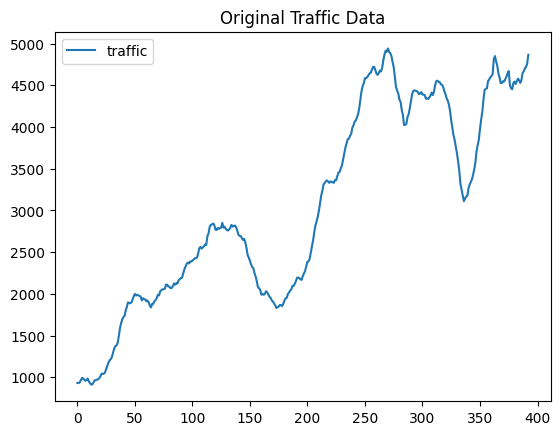

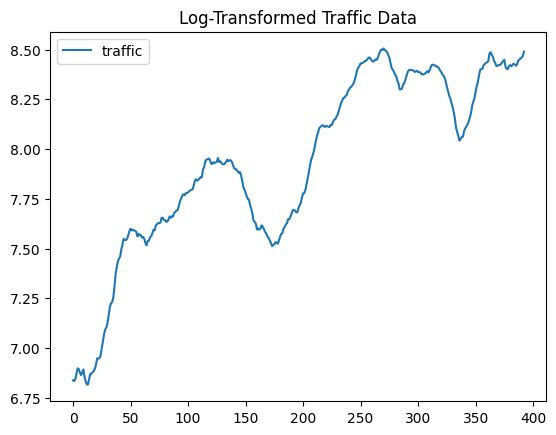

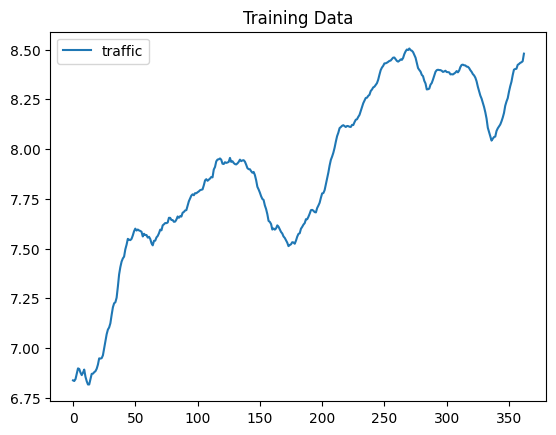

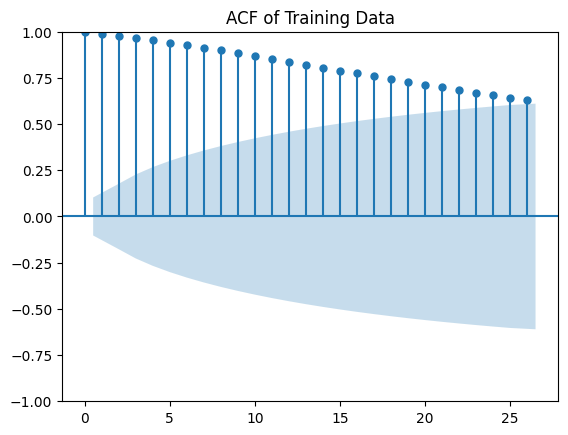

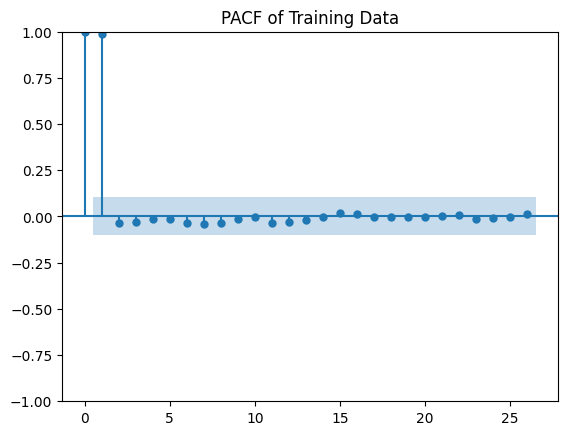

ADF Statistic: -2.1081222771411974
p-value: 0.24126116082883997


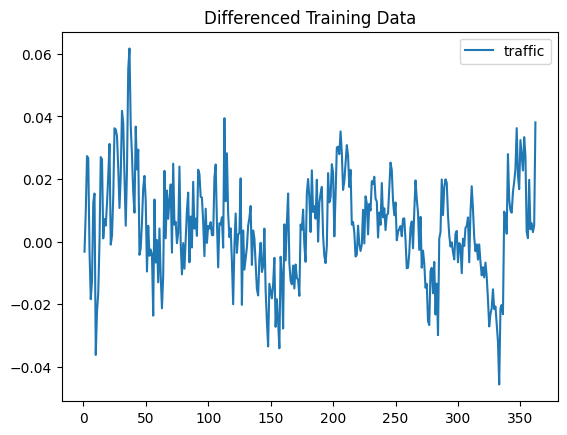

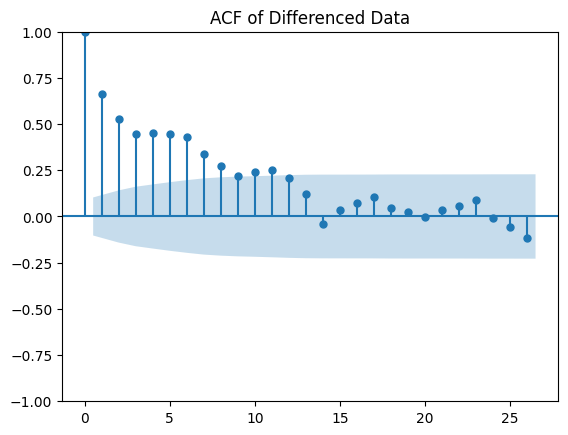

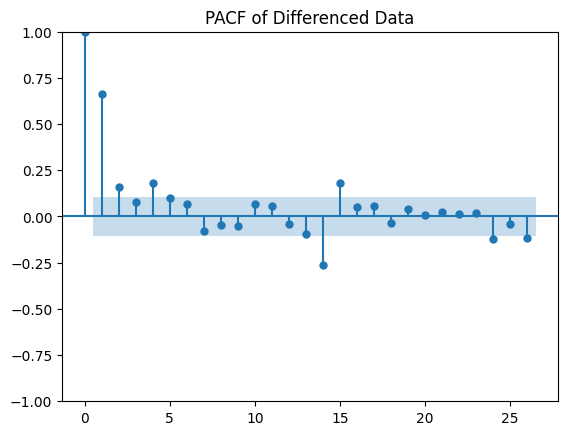

ADF Statistic after differencing: -3.1656759158362915
p-value after differencing: 0.022059461239130353


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  363
Model:               SARIMAX(1, 1, 4)   Log Likelihood                1106.169
Date:                Sun, 09 Mar 2025   AIC                          -2198.338
Time:                        10:02:12   BIC                          -2171.096
Sample:                             0   HQIC                         -2187.508
                                - 363                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0005      0.000      1.385      0.166      -0.000       0.001
ar.L1          0.8942      0.040     22.139      0.000       0.815       0.973
ma.L1         -0.3784      0.071     -5.314      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                traffic   No. Observations:                  363
Model:                 ARIMA(1, 1, 4)   Log Likelihood                1105.027
Date:                Sun, 09 Mar 2025   AIC                          -2198.054
Time:                        10:02:12   BIC                          -2174.704
Sample:                             0   HQIC                         -2188.772
                                - 363                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9251      0.031     29.918      0.000       0.864       0.986
ma.L1         -0.4036      0.065     -6.237      0.000      -0.530      -0.277
ma.L2         -0.1223      0.063     -1.936      0.0

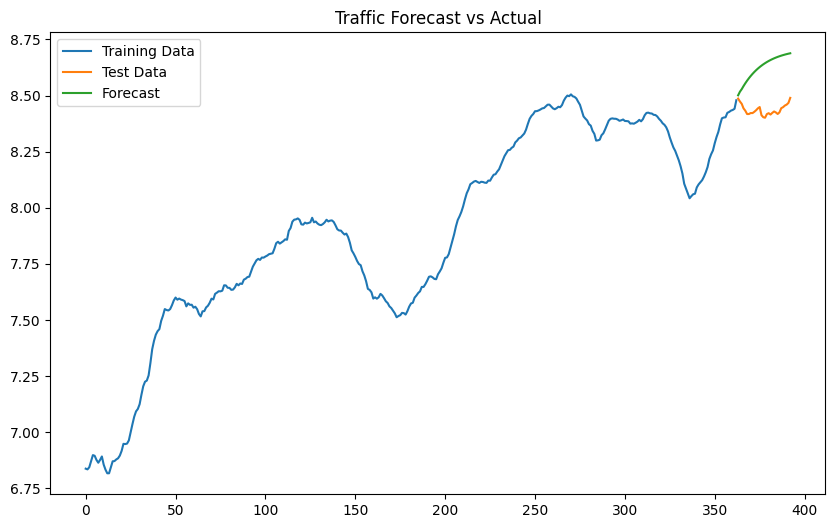

MAE: 0.18911331651590432
MAPE: 0.022427189746041784
RMSE: 0.19937572680992216


In [3]:
# Install pmdarima (if not already installed)
!pip install pmdarima

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import pmdarima as pm

# -------------------------------
# Step 0: Upload and Explore the Dataset
# -------------------------------

# Upload the CSV file (e.g., website_data.csv)
from google.colab import files
uploaded = files.upload()  # Follow the prompt to upload your dataset

# Read the dataset (make sure the CSV file has a column named 'traffic')
df = pd.read_csv('website_data.csv')
df.info()

# Plot the original data
df.plot(title='Original Traffic Data')
plt.show()

# Log transformation to stabilize variance
df['traffic'] = np.log(df['traffic'])  # Remember to transform back when making real predictions
df.plot(title='Log-Transformed Traffic Data')
plt.show()

# -------------------------------
# Split Data into Training and Test Sets
# -------------------------------

# Use all but the last 30 entries for training, last 30 for testing
train_size = len(df) - 30
df_train = df.iloc[:train_size].copy()
df_test = df.iloc[train_size:].copy()

# -------------------------------
# Step 1: Check for Stationarity
# -------------------------------

# Plot training data
df_train.plot(title='Training Data')
plt.show()

# Plot ACF and PACF for training data
plot_acf(df_train['traffic'], title='ACF of Training Data')
plt.show()

plot_pacf(df_train['traffic'], title='PACF of Training Data')
plt.show()

# Augmented Dickey-Fuller (ADF) test for stationarity
adf_test = adfuller(df_train['traffic'])
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])

# If series is non-stationary (p-value > 0.05), difference the series
if adf_test[1] > 0.05:
    df_train_diff = df_train.diff().dropna()
    df_train_diff.plot(title='Differenced Training Data')
    plt.show()

    plot_acf(df_train_diff['traffic'], title='ACF of Differenced Data')
    plt.show()

    plot_pacf(df_train_diff['traffic'], title='PACF of Differenced Data')
    plt.show()

    adf_test_diff = adfuller(df_train_diff['traffic'])
    print('ADF Statistic after differencing:', adf_test_diff[0])
    print('p-value after differencing:', adf_test_diff[1])
else:
    df_train_diff = df_train.copy()

# -------------------------------
# Step 2: Determine ARIMA Model Parameters
# -------------------------------

# Use auto_arima to find optimal (p, d, q) parameters (non-seasonal)
auto_arima_model = pm.auto_arima(df_train['traffic'], seasonal=False, stepwise=True)
print(auto_arima_model.summary())

# -------------------------------
# Step 3: Fit the ARIMA Model
# -------------------------------

# Fit ARIMA model using the order suggested by auto_arima
model = ARIMA(df_train['traffic'], order=auto_arima_model.order)
model_fit = model.fit()
print(model_fit.summary())

# -------------------------------
# Step 4: Make Time Series Predictions
# -------------------------------

# Forecast the test period (last 30 entries)
forecast_test = model_fit.forecast(steps=len(df_test))
df_test['forecast'] = forecast_test

# Plot training data, test data, and forecasted values
plt.figure(figsize=(10,6))
plt.plot(df_train.index, df_train['traffic'], label='Training Data')
plt.plot(df_test.index, df_test['traffic'], label='Test Data')
plt.plot(df_test.index, df_test['forecast'], label='Forecast')
plt.legend()
plt.title('Traffic Forecast vs Actual')
plt.show()

# -------------------------------
# Step 5: Evaluate Model Predictions
# -------------------------------

mae = mean_absolute_error(df_test['traffic'], df_test['forecast'])
mape = mean_absolute_percentage_error(df_test['traffic'], df_test['forecast'])
rmse = np.sqrt(mean_squared_error(df_test['traffic'], df_test['forecast']))

print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')


In [4]:
import joblib

# Assuming 'model_fit' is your fitted ARIMA model
joblib.dump(model_fit, 'arima_model.pkl')


['arima_model.pkl']